
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 2
---

##**GRUPO 17**

**Balbuena, Florencia**

**Conrrero, Agustina**

**Sanchez Herrera, Carlos**

**Serrantes, Sebastian**

---

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import math 
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
#Nivel de significancia
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

groupC = df[(df.salary_monthly_NETO > 1000) & is_man]
groupD = df[(df.salary_monthly_NETO > 1000) & ~is_man]


groups_concat = pd.concat([groupC, groupD], axis=1).salary_monthly_NETO
groups_concat.columns = ['NETO_A', 'NETO_B']
groups_concat.describe()

,NETO_A,NETO_B
count,4.815000e+03,891.000000
mean,1.014816e+05,78219.250943
std,1.022153e+05,56515.327324
min,1.100000e+03,2000.000000
25%,5.500000e+04,47600.000000
50%,8.000000e+04,67310.000000
75%,1.100000e+05,94000.000000
max,2.080000e+06,800000.000000


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Para calcular una estimación puntual se utilizó al estadístico media muestral que sabemos que es un buen estimador de μ. Por lo tanto, se calculó la media de ambos grupos y se restó para obtener la diferencia. 

In [ ]:
est_media_A = groupA.mean()
est_media_B = groupB.mean()
media_dif = est_media_A - est_media_B
media_dif

23262.37339991823

In [ ]:
#Calculo de varianza
print("varianzaA: ", groupA.var(), "varianza B: ", groupB.var())

varianzaA:  10447968511.734694 varianza B:  3193982222.482429


Se calculo el intervalo de confianza de nivel 1-0.05(alpha). Esto significa que existe una probabilidad del 95% que el verdadero parámetro se encuentre en el intervalo propuesto. En otras palabras, se trata de un intervalo del 95% de confianza.
Este intervalo de confianza se relaciona con el test de hipótesis ya que nos permite tomar decisiones (más específicamente, aceptar o rechazar una hipótesis). 

Se graficó un histográma con las medias y distribuciones para ambos grupos, y se identificó que se trata de una muestra con distribucion normal.

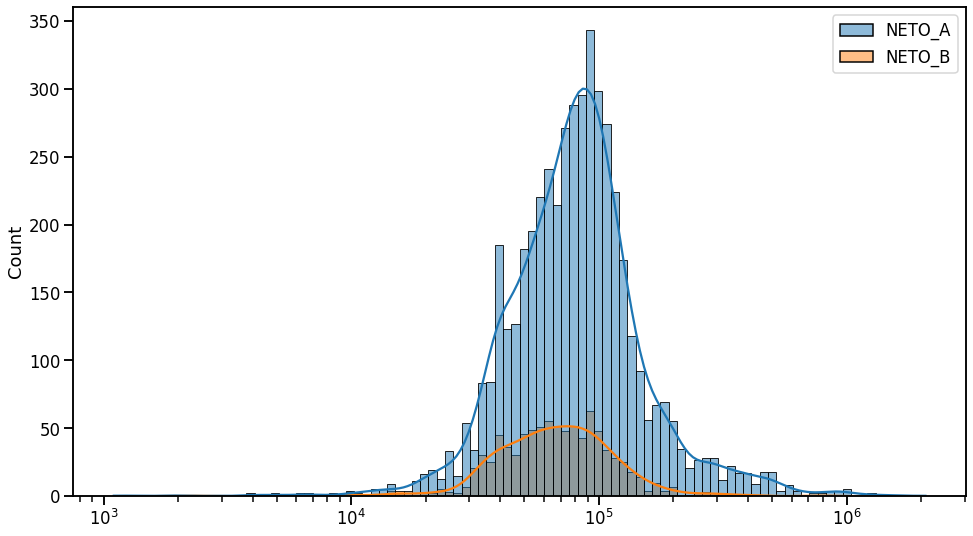

In [ ]:
#Grafica de distribucion de ambos grupos
fig = plt.figure(figsize=(16,9))
sns.histplot(data=groups_concat, kde=True, log_scale=True, )

Para el cálulo del intervalo de confianza se usó el Test de Welch debido a que las varianzas son diferentes. Para el cálculo de la diferencia entre medias se utilizó la siguiente fórmula.
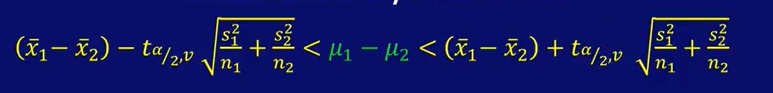

Para ello, necesito calcular la media, varianza y N de cada grupo:

In [ ]:
var_A = groupA.var()
var_B = groupB.var()
N_A = groupA.count() 
N_B = groupB.count()

print("estadisticos grupo A: ", est_media_A, var_A, N_A)
print("estadisticos grupo B: ", est_media_B, var_B, N_B)


estadisticos grupo A:  101481.62434267918 10447968511.734694 4815
estadisticos grupo B:  78219.25094276095 3193982222.482429 891


Además, se necesita calcular la cantidad de grados de libertad. Para ello, se utilizó la siguiente fórmula:

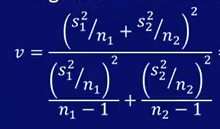

In [ ]:
v = (((var_A/N_A)+(var_B/N_B))**2)/((((var_A/N_A)**2)/(N_A-1))+(((var_B/N_B)**2)/(N_B-1)))
v

2148.0505828160885

Los grados de libertad son 2148, por lo que utilizamos Z = 1.645 según la tabla de t de student para un intervalo de 95% de confianza (alpha=0.05).

In [ ]:
z = 1.645

Para calcular el intervalo de confianza para la diferencia entre las medias utilizo la primer fórmula presentada en este entregable:

In [ ]:
lim_inf = (est_media_A - est_media_B) - (z * math.sqrt((var_A/N_A)+(var_B/N_B)))
lim_inf

19316.22599042841

In [ ]:
lim_sup = (est_media_A - est_media_B) + (z * math.sqrt((var_A/N_A)+(var_B/N_B)))
lim_sup

27208.520809408048

El intervalo del 95% de confianza para la diferencia entre medias de grupo A y B es:

In [ ]:
print(lim_inf, ">", "(media_grupo_A - media_grupo_B)", "<", lim_sup)

19316.22599042841 > (media_grupo_A - media_grupo_B) < 27208.520809408048


La relación entre el intervalo de confianza y el test de hipótesis es que, si el intervalo de confianza no contiene el valor de la hipótesis nula, los resultados son estadísticamente significativos. Si el valor de P es menor que alfa, el intervalo de confianza no contendrá el valor de hipótesis nula.

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0$= la diferencia entre las medias de los salarios del Grupo A y B es igual a 0.

**Hipótesis Alternativa**

$H_1$= la diferencia entre las medias de los salarios del Grupo A y B es distinta de 0.

**Nivel de significancia alfa**
* alfa = 0.05


  * El estadístico es la diferencia entre medias. El dataset posee una distribución normal, de acuerdo a lo calculado en el punto anterior (media y desviación).

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [ ]:
#Cálculo de pvalor usando ttest_ind
from scipy.stats import ttest_ind

t_stat,pvalue = ttest_ind(groupA, groupB, equal_var = False)
print('t-statistics:', t_stat, '\np-value:', pvalue)

Debido a que el pvalor es menor que el alfa y que el intervalo de confianza no incluye al 0, podemos rechazar Ho. Por lo tanto, podemos afirmar que la diferencua entre las medias de ambos grupos evaluados es distinta de cero (aceptación de la hipótesis alternativa).

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power = 0.8

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


* El tweet se encuentra en el PDF que acompaña este archivo.